# Library

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# 라이브러리 설치
!pip install --upgrade --no-cache-dir numpy seaborn
!pip install ydata_profiling
!pip install missingno
!pip install tqdm

!pip install -U kss==5.2.0
!pip install kiwipiepy
!pip install soynlp
!pip install keybert
!pip install keybert[gensim]
!pip install sentence_transformers

!pip install nltk
!pip install konlpy
!pip install gensim
!pip install bertopic -U
!pip install bertopic[visualization] -U
!pip install -U accelerate
!pip install -U transformers
!pip install datasets

!pip install catboost
!pip install tensorflow==2.15 keras==2.15
!pip install keras-tqdm
!pip install shap

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 74.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
ydata-profiling 4.16.1 requires numpy<2.2,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.

In [ ]:
# Auto reload of library
%load_ext autoreload
%autoreload 2

# System related and data input controls
import os

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# Visualization
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
## 한글 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
## NanumGothic 폰트 경로 지정
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
## 한글 폰트 설정
matplotlib.rcParams['font.family'] = font_prop.get_name()
plt.rc('font', family='NanumGothic')
sns.set(font=font_prop.get_name())
## 마이너스 표시 설정
plt.rcParams['axes.unicode_minus'] = False

# Understanding of Data
from ydata_profiling import ProfileReport
import missingno as msno

# Common
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from xgboost import plot_importance as plot_importance_xgb
from lightgbm import plot_importance as plot_importance_lgbm
from catboost import CatBoostClassifier
from mlxtend.classifier import StackingClassifier, StackingCVClassifier

# Custom
## 사용자의 실제 작업경로로 설정!
work_path = '/content/drive/MyDrive/Research/Analysis/Lecture/특강_20250412_한국지능정보사회진흥원_빅데이터센터'
os.chdir(work_path)
!ls
from module_KK import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
 BA1_TargetMarketing_DataPreprocessing_KK.ipynb     Data	   __pycache__
 BA1_TargetMarketing_ModelingBase_KK.ipynb	    mlruns	   README.md
 BA2_DemandForecasting_DataPreprocessing_KK.ipynb   Model	   Result
 BA2_DemandForecasting_DataSentiment_KK.ipynb	    module_KK.py  '나눔 글꼴'
 BA2_DemandForecasting_ModelingAI_KK.ipynb	    outputs


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Hyperparameter

In [ ]:
# Data Preprocessing
file_location = os.path.join(os.path.join('.', 'Data', 'df_concat_BA1.csv'))
Y_colname = '기부여부'
TEST_SIZE = 0.2
RANDOM_STATE = 123
SCALER = MinMaxScaler()
LABEL_LIST = ['Non-donation', 'Donation']

# Data Preprocessing

- 불필요 변수 삭제
- 결측치 채우기
- 이상치 처리
- 데이터 변환
- 종속변수/독립변수 & Train/Test 분리
- 스케일링

In [ ]:
# Data Loading
df = pd.read_csv(file_location, encoding='utf-8-sig')

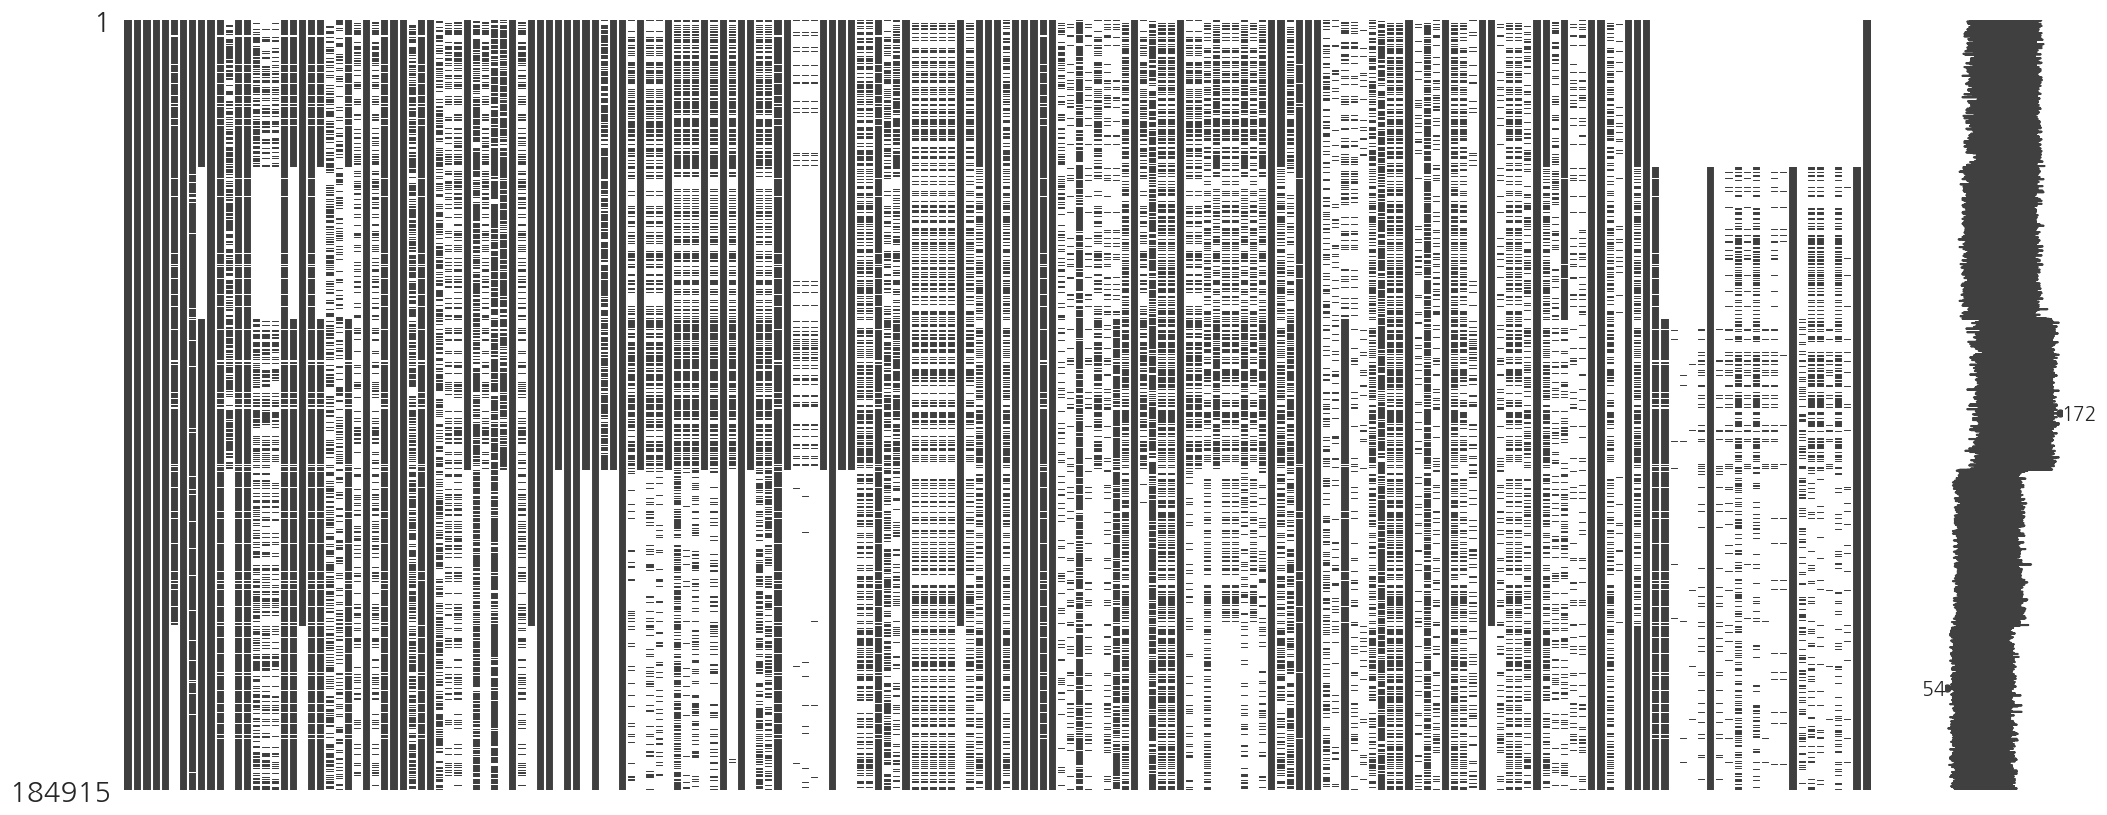

(184915, 107)


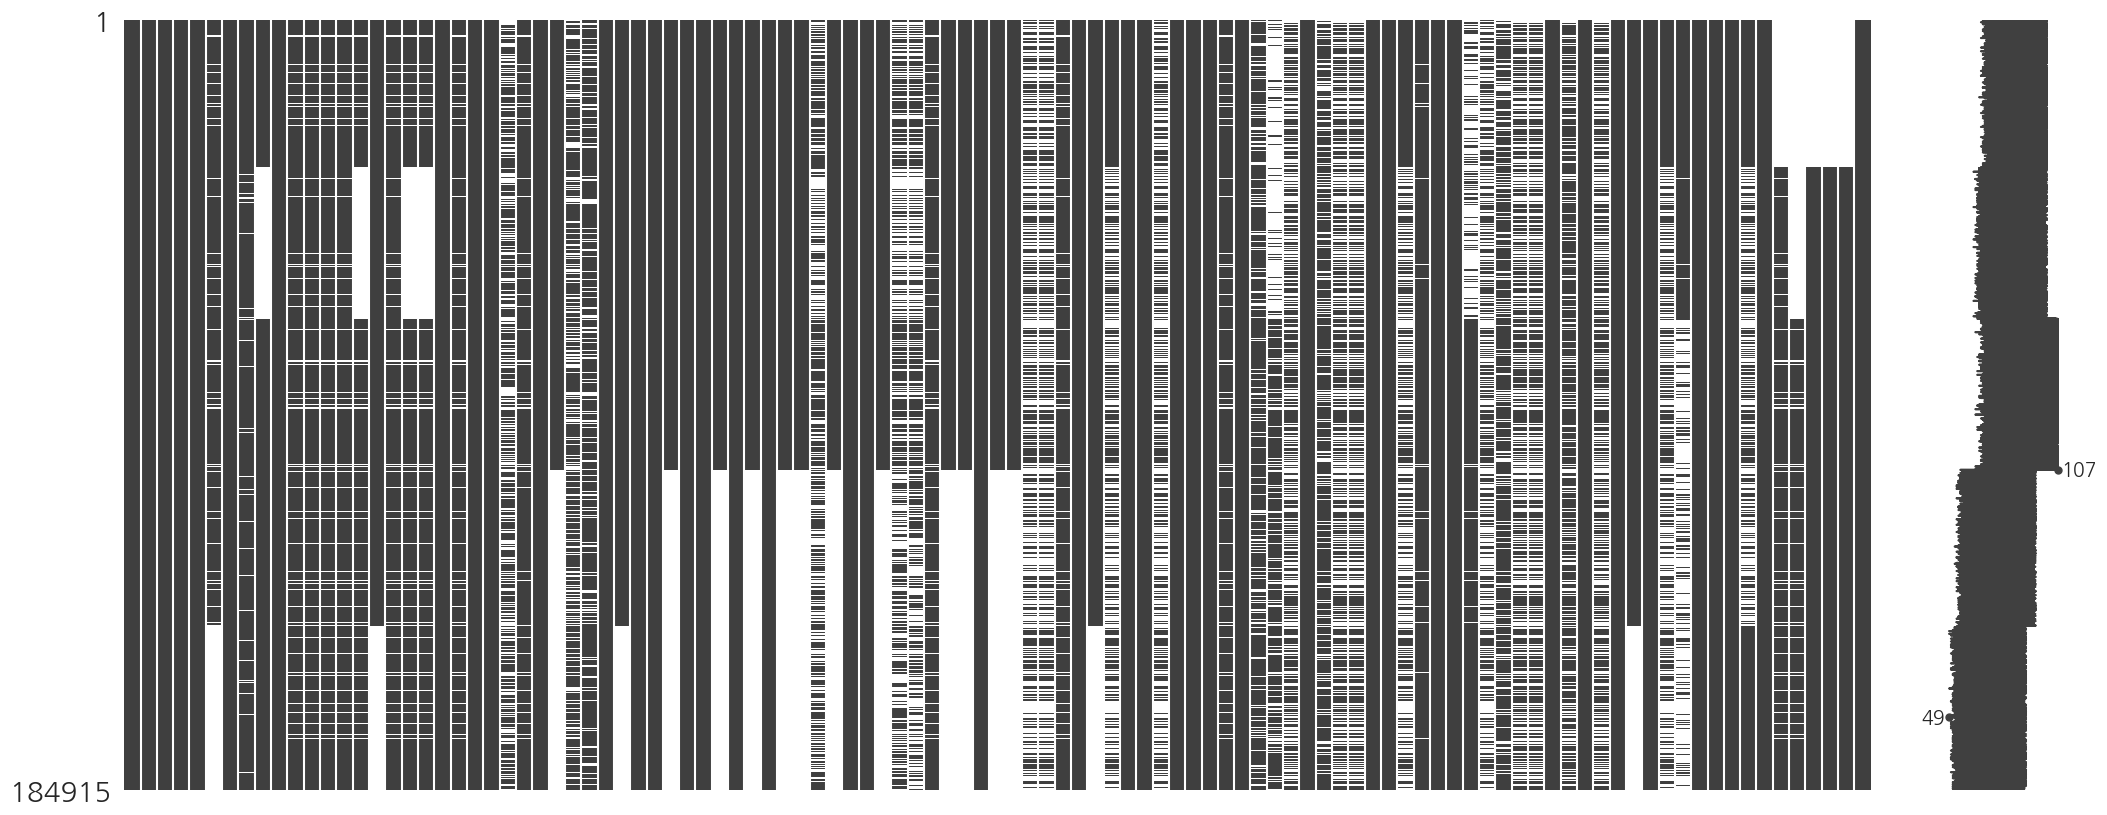

(184915, 106)
(184915, 101)


In [ ]:
# 불필요 변수 삭제
msno.matrix(df)
plt.show()
## 결측치의 비율이 50% 넘는 변수 삭제
colname_nullmany = df.columns[df.isnull().sum() > int(df.shape[0] * 0.5)]
if (len(colname_nullmany) != 0) and (colname_nullmany[0] in df.columns):
  df.drop(columns=colname_nullmany, inplace=True)
  print(df.shape)
  msno.matrix(df)
  plt.show()
## 변수의 값 종류가 1개인 변수 삭제
colname_uniqueval = [col for col in df.columns if len(df[col].unique()) <= 1]
if (len(colname_uniqueval) != 0) and (colname_uniqueval[0] in df.columns):
  df.drop(columns=colname_uniqueval, inplace=True)
  print(df.shape)
## 분석과 무관한 변수 삭제
colname_delete = ['가구일련번호', '가구원번호', '가구주관계코드', '가구가중값', '가구원가중값']
if colname_delete[0] in df.columns:
  df.drop(columns=colname_delete, inplace=True)
  print(df.shape)

100%|██████████| 64/64 [00:00<00:00, 227.79it/s]


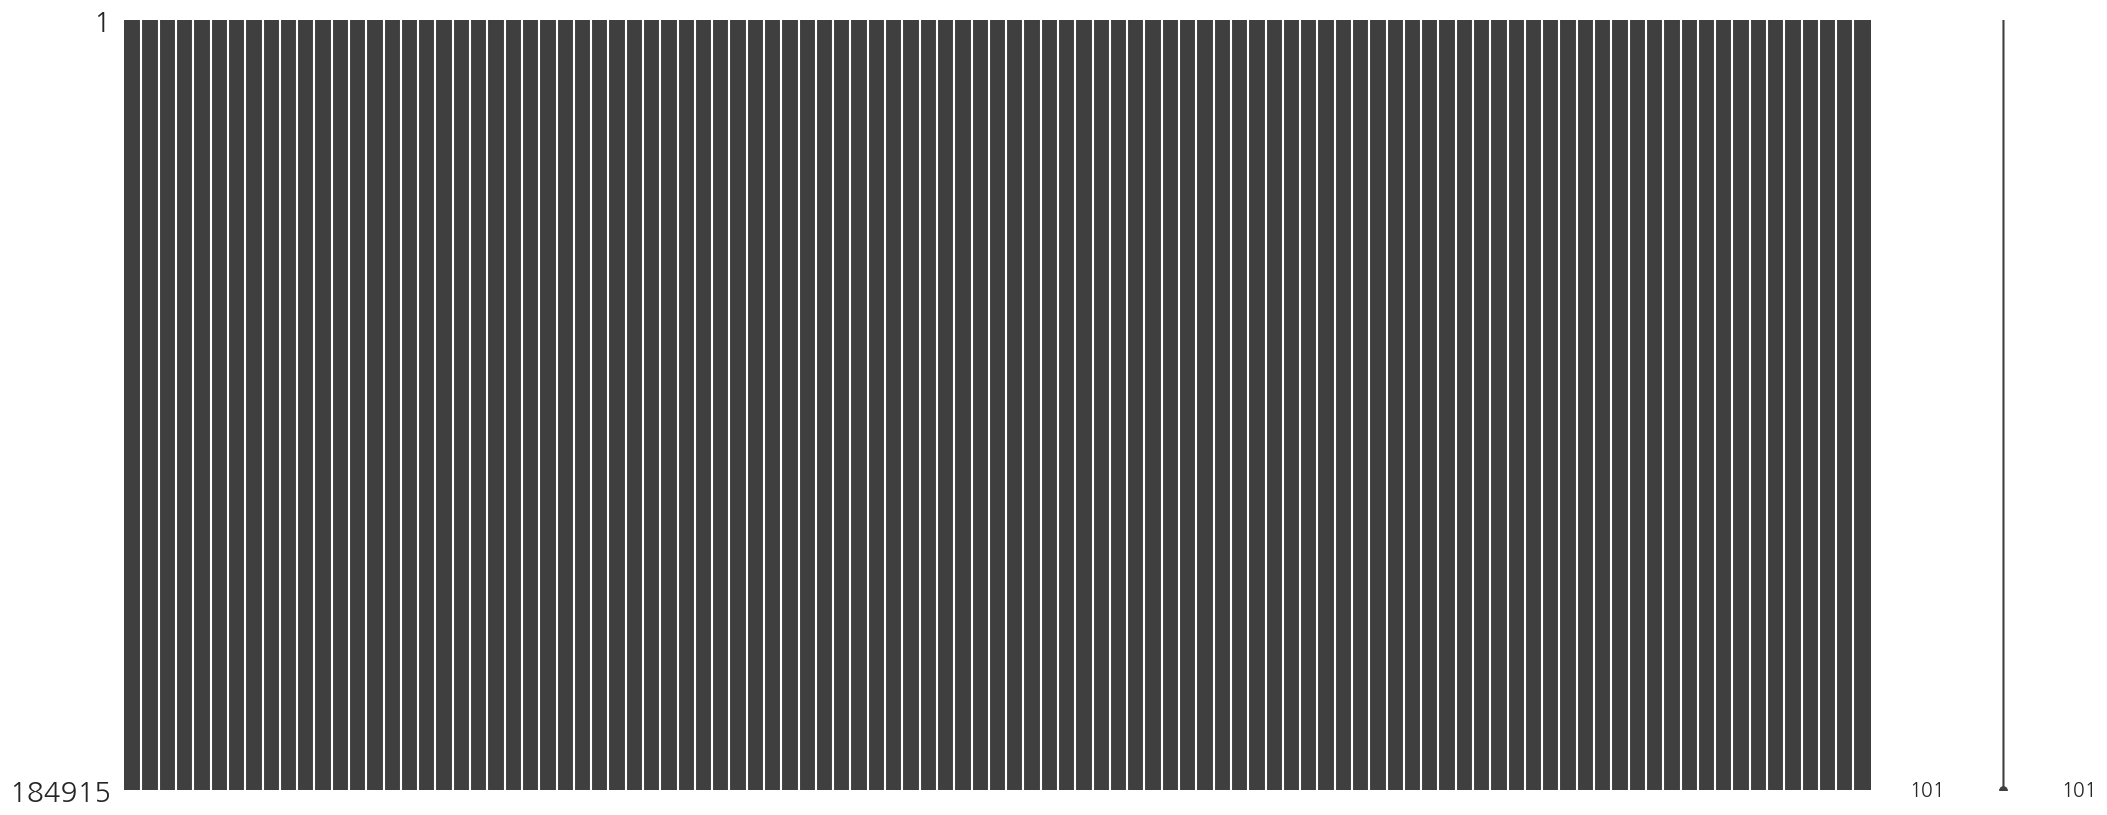

In [ ]:
# 결측치 채우기
colname_null = df.columns[df.isnull().sum() != 0]
for col in tqdm(colname_null):
    ## 문자가 아니면
    if df[col].dtype != 'object':
      try:
          fill_value = df[col].fillna(df[col].min()-1).astype('float').max()+1
          df[col].fillna(fill_value, inplace=True)
          df[col] = df[col].astype('float')
      except:
          pass
    ## 문자면
    elif df[col].dtype == 'object':
        df[col].fillna('Temp_KK', inplace=True)
msno.matrix(df)
plt.show()

In [ ]:
# 종속변수/독립변수 & Train/Test 분리
display(df[Y_colname].value_counts())
X_colname = [x for x in df.columns if x != Y_colname]
X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[[Y_colname]],
                                                    test_size=TEST_SIZE, random_state=RANDOM_STATE)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print('Data Split!')

,count
기부여부,
0,138889
1,46026


(147932, 100) (147932, 1)
(36983, 100) (36983, 1)
Data Split!


In [ ]:
# 스케일링
SCALER.fit(X_train)
X_train = SCALER.transform(X_train)
X_test = SCALER.transform(X_test)
print(X_train.shape, Y_train.shape, X_train.min(), X_train.max())
print(X_test.shape, Y_test.shape, X_test.min(), X_test.max())
print('Complete!')

(147932, 100) (147932, 1) 0.0 1.0000000000000004
(36983, 100) (36983, 1) 0.0 1.0000000000000004
Complete!


## Functionalization by ChatGPT

```python
너는 전문적인 Python 기반 Data Scientist다.
- 목표: 전처리가 완료된 함수를 생성해줘
- 함수이름: preprocessing_MDIS_KK
- 함수입력: df
- 함수출력: X_train, X_test, Y_train, Y_test, df_prep
- 출력형태: X는 모두 array, Y는 모두 dataframe, df_prep는 dataframe
- 전처리1: 결측치의 비율이 50% 넘는 변수는 삭제해줘
- 전처리2: 변수의 값의 종류가 1개인 변수는 삭제해줘
- 전처리3: ['가구일련번호', '가구원번호', '가구주관계코드', '가구가중값', '가구원가중값'] 변수들은 삭제해줘
- 전처리4: 결측치를 채워야 하는데 변수의 값의 형태가 문자인 경우엔 Temp_KK라는 값으로 채워주고, 숫자인 경우엔 값들의 "최대값+1"의 값으로 채워줘
- 전처리5: 종속변수의 이름은 "기부여부"야. 나머지는 모두 독립변수로 반영해줘
- 전처리6: train_test_split 함수를 사용하고 test_size=0.2, random_state=123을 사용해서 데이터를 분리해줘
- 전처리7: MinMaxScaler를 사용해서 X_train, X_test를 변환해줘
```

In [ ]:
def preprocessing_MDIS_KK(df):
    df_prep = df.copy()

    # 전처리 1: 결측치의 비율이 50%를 초과하는 변수 삭제
    missing_ratio = df_prep.isnull().mean()
    cols_to_drop_missing = missing_ratio[missing_ratio > 0.5].index
    df_prep.drop(cols_to_drop_missing, axis=1, inplace=True)

    # 전처리 2: 값의 종류가 1개인 변수 삭제
    cols_to_drop_single = [col for col in df_prep.columns if df_prep[col].nunique() == 1]
    df_prep.drop(cols_to_drop_single, axis=1, inplace=True)

    # 전처리 3: 분석과 무관한 변수 삭제
    irrelevant_cols = ['가구일련번호', '가구원번호', '가구주관계코드', '가구가중값', '가구원가중값']
    df_prep.drop([col for col in irrelevant_cols if col in df_prep.columns], axis=1, inplace=True)

    # 전처리 4: 결측치 처리
    for col in df_prep.columns:
        if df_prep[col].isnull().sum() > 0:
            if df_prep[col].dtype == 'object':
                df_prep[col].fillna('Temp_KK', inplace=True)
            else:
                df_prep[col].fillna(df_prep[col].max() + 1, inplace=True)

    # 전처리 5: 종속변수 설정
    Y = df_prep[['기부여부']]
    X = df_prep.drop('기부여부', axis=1)

    # 전처리 6: 데이터 분할
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

    # 전처리 7: MinMaxScaler 적용
    numeric_cols = X_train.select_dtypes(include=['number']).columns
    scaler = MinMaxScaler()

    X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
    X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

    return X_train.values, X_test.values, Y_train, Y_test, df_prep

# 데이터분석 프로세스
## 데이터 로딩
df = pd.read_csv(file_location, encoding='utf-8-sig')
## 데이터 전처리
X_train, X_test, Y_train, Y_test, df_prep = preprocessing_MDIS_KK(df)
## 결과 확인
print(X_train.shape, Y_train.shape, X_train.min(), X_train.max())
print(X_test.shape, Y_test.shape, X_test.min(), X_test.max())
print('Complete!')

(147932, 99) (147932, 1) 0.0 1.0000000000000004
(36983, 99) (36983, 1) 0.0 1.0000000000000004
Complete!


# Data Understanding

In [ ]:
# 종속변수에 따른 독립변수 분포 비교
comparisonstat = table_ratiobyclass(df, Y_colname,
                                    label_list=LABEL_LIST, sorting=True)
comparisonstat

Number of significant features:  175 (0.9210526315789473%)


Non-donation        Donation  \
향후기부의사여부      1.0000      32414 (45.52%)  38795 (54.48%)   
              2.0000     106475 (93.64%)    7231 (6.36%)   
가구원가중값        45.2365        13 (81.25%)      3 (18.75%)   
              47.3594        14 (66.67%)      7 (33.33%)   
              52.5616        25 (96.15%)       1 (3.85%)   
...                                  ...             ...   
분류코드_만13세이상여부 1.0000     138889 (75.11%)  46026 (24.89%)   
분류코드_만15세이상여부 2.0000     135565 (74.99%)  45211 (25.01%)   
분류코드_점유형태2코드  39.0000     46889 (77.47%)  13635 (22.53%)   
분류코드_주택형태2코드  49.0000     19448 (78.28%)   5395 (21.72%)   
분류코드_연령2코드    6500.0000   35746 (85.24%)   6191 (14.76%)   

                                          Statistics  
향후기부의사여부      1.0000     $\chi^2$=54233.75, $p$=0.00  
              2.0000                                  
가구원가중값        45.2365    $\chi^2$=17301.18, $p$=0.00  
              47.3594                                 
              52.5616                                 
...                                              ...  
분류코드_만13세이상여부 1.0000                $T$=nan, $p$=nan  
분류코드_만15세이상여부 2.0000                $T$=nan, $p$=nan  
분류코드_점유형태2코드  39.0000               $T$=nan, $p$=nan  
분류코드_주택형태2코드  49.0000               $T$=nan, $p$=nan  
분류코드_연령2코드    6500.0000             $T$=nan, $p$=nan  

[43482 rows x 3 columns]

In [ ]:
# 자동화 라이브러리 사용해서 빠르게 확인 가능
colname_random = [Y_colname] + [col for col in np.random.choice(df.columns, size=15, replace=False)]
profile = ProfileReport(df[colname_random])
profile

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 기초통계 확인
print(df.shape)
print()
df.describe(include='all').T

(184915, 191)



,count,mean,std,min,25%,50%,75%,max
가구일련번호,184915.0,9095.989503,5338.388894,1.0,4478.0,8977.0,13700.5,18576.0
가구원번호,184915.0,1.742779,0.923398,1.0,1.0,1.0,2.0,9.0
주관적만족감코드,184915.0,2.776303,0.955955,1.0,2.0,3.0,3.0,5.0
성별코드,184915.0,1.519855,0.499607,1.0,1.0,2.0,2.0,2.0
가구주관계코드,184915.0,1.889014,1.320846,1.0,1.0,1.0,2.0,10.0
...,...,...,...,...,...,...,...,...
자원봉사활동_재해지역주민돕기및시설복구관련횟수,6456.0,0.487763,2.768503,0.0,0.0,0.0,0.0,104.0
독서_잡지류권수,46041.0,2.825243,7.160257,0.0,0.0,0.0,3.0,300.0
자원봉사활동_환경보전범죄예방관련시간수,5110.0,32.166145,86.211443,1.0,2.0,3.0,5.0,720.0
레저시설이용횟수,149498.0,1.357149,0.479161,1.0,1.0,1.0,2.0,2.0
